In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d samuelcortinhas/sports-balls-multiclass-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/sports-balls-multiclass-image-classification
License(s): CC0-1.0
 99% 396M/401M [00:11<00:00, 37.8MB/s]
100% 401M/401M [00:11<00:00, 35.9MB/s]


# To Do List

---

# Click Here to Import Packages


---


*   DataSet Extraction
*   Dataset OverView
*   Data Preprocessing
*   Building Model Without Tuner
*   Building Model With Tuner
*   Comapare Both's Train & Valid Curve
*   Model
Evaluation and
Performance
Metrics











In [ ]:
!pip install keras-tuner

# **My Configs**

Config Dataset Loading Task

In [ ]:
dataset_loc='/content/sports-balls-multiclass-image-classification.zip'
USE_Unzipper=True
USE_Datagen=True
USE_Pipeline=False
USE_DetectImbancedDataset=True

Config PreProcessing Task Need To Be Done

In [ ]:

USE_Resize=True
USE_Rescale=True
USE_Grayscale=False
USE_Rotate=False
USE_Brightness=False
USE_Noiseremove=True
USE_DetectImbalancedDataset=True
USE_Dataaugmentation=True


Config the Base OF CNN

In [ ]:
USE_MobileNet=False
USE_Inception=False
USE_VGG16=False
USE_VGG19=False
USE_RestNet=False
USE_CustomConvulation=True

In [ ]:
EnableStruct=False  #already in proper structure
#Class='binary'
Class='categorical'
datagen_batch=32

In [ ]:
if USE_Unzipper:
  import zipfile
  zip_ref = zipfile.ZipFile(dataset_loc, 'r')
  zip_ref.extractall('/content')
  zip_ref.close()

In [ ]:
train_loc='/content/train'
test_loc='/content/test'

In [ ]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    if not image_filenames:
        raise ValueError("No images found in the specified path")
    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))
    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')
    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)
        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

Visualize 5 random images

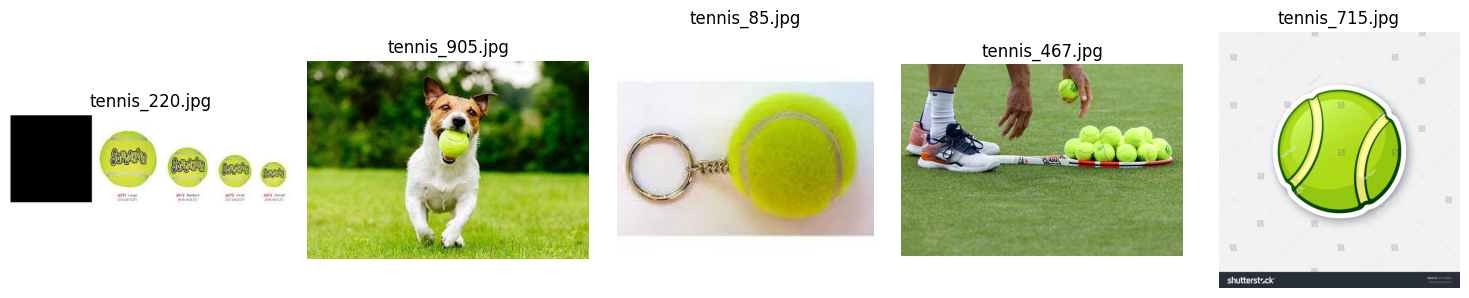

In [ ]:
visualize_images(train_loc+'/tennis_ball', num_images=5)

# **Preprocessings**

### **train_datagen:**

Read This [Article](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)

**rescale=1./255:** Normalizes pixel values in the training images between 0 and 1. This is a common preprocessing step for image data, as neural networks typically work better with normalized values.

**rotation_range=40**: Applies random rotations to the training images within a range of -40° to 40° degrees. This helps the model become more robust to variations in object orientation.

**width_shift_range=0.1**, height_shift_range=0.1: Randomly shifts the training images horizontally and vertically by up to 10% of their width and height, respectively. This simulates small changes in camera position or object placement.

**horizontal_flip=True:** Randomly flips the training images horizontally. This helps the model learn to recognize objects regardless of their orientation.

**validation_split=0.2:** Splits the training data into training (80%) and validation (20%) sets. The validation set is used to monitor model performance during training and avoid overfitting.

### **test_datagen:**

**rescale=1./255:** Applies the same normalization to the test images as the training images. This ensures consistency in the data processing pipeline.

### *Show Preprocessing Demo*


---



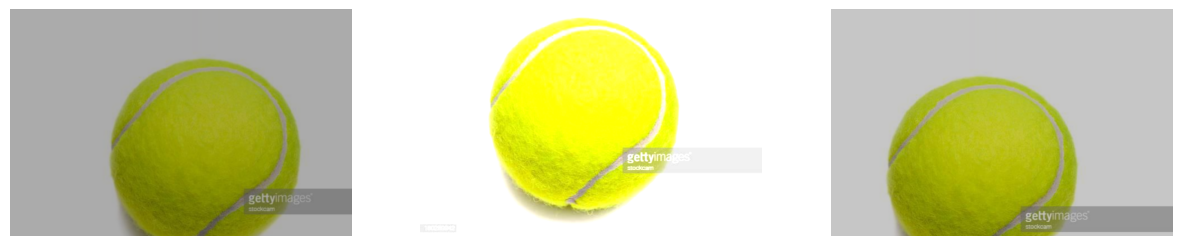

In [ ]:
img=Image.open(train_loc+'/tennis_ball/tennis_533.jpg')
datagen = ImageDataGenerator(width_shift_range=0.2, shear_range=0.2,height_shift_range=0.2,brightness_range=[0.4,1.5])
# Create an iterator for augmented images
aug_iter = datagen.flow(np.expand_dims(img, axis=0), batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# generate batch of images
for i in range(3):
    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')

    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

plt.show()

**DataGenerator With Preprocessing**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range=40,
                             fill_mode='nearest',
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             )

val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
if USE_Datagen:
  train_ds = train_datagen.flow_from_directory(
    directory = train_loc,
    batch_size = 32,
    target_size = (224, 224),
    class_mode=Class,
    seed=123)

  validation_ds = val_datagen.flow_from_directory(
    directory=test_loc,
    batch_size=32,
    target_size=(224, 224),
    class_mode=Class,
    seed=123)

Found 14656 images belonging to 16 classes.
Found 3682 images belonging to 16 classes.


In [ ]:
num_of_class=16

# Get class labels

In [ ]:

train_labels = train_ds.class_indices
validation_labels = validation_ds.class_indices
print('Train Labels:')
print(train_labels)
print('Validation Labels:')
print(validation_labels)
#print("Validation Labels:", validation_labels)

Train Labels:
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_ball': 13, 'train': 14, 'volleyball': 15}
Validation Labels:
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_ball': 13, 'test': 14, 'volleyball': 15}


#  **Model Building Without Tuning**

In [ ]:
# Build the model
model = Sequential()

### Base Of CNN [To Use any Spefic Model first Enable]

In [ ]:
if USE_MobileNet:
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3),
                              pooling='avg')
    base.trainable = False
    # Build the model
    model = Sequential()
    # Add the pre-trained Xception base
    model.add(base)
    # Batch Normalization
    model.add(BatchNormalization())
    # Dropout Layer
    model.add(Dropout(0.35))
    # Add a dense layer with 120 units and ReLU activation function
    model.add(Dense(220, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
    # Add a dense layer with 120 units and ReLU activation function
    model.add(Dense(60, activation='relu'))
    # Add the output layer with 1 unit and sigmoid activation function for binary classification
    model.add(Dense(num_of_class, activation='softmax'))

elif USE_VGG16:
    base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3),
                              pooling='avg')
    base.trainable = False
    # Build the model
    model = Sequential()
    # Add the pre-trained Xception base
    model.add(base)
    # Batch Normalization
    model.add(BatchNormalization())
    # Dropout Layer
    model.add(Dropout(0.35))
    # Add a dense layer with 120 units and ReLU activation function
    model.add(Dense(220, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
    # Add a dense layer with 120 units and ReLU activation function
    model.add(Dense(60, activation='relu'))
    # Add the output layer with 1 unit and sigmoid activation function for binary classification
    model.add(Dense(num_of_class, activation='softmax'))
elif USE_RestNet:
    base = RestNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3),
                              pooling='avg')
    base.trainable = False
    # Build the model
    model = Sequential()
    # Add the pre-trained Xception base
    model.add(base)
    # Batch Normalization
    model.add(BatchNormalization())
    # Dropout Layer
    model.add(Dropout(0.35))
    # Add a dense layer with 120 units and ReLU activation function
    model.add(Dense(220, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
    # Add a dense layer with 120 units and ReLU activation function
    model.add(Dense(60, activation='relu'))
    # Add the output layer with 1 unit and sigmoid activation function for binary classification
    model.add(Dense(num_of_class, activation='softmax'))
elif USE_CustomConvulation:
    ### Used My Custom ConvulutionArchitecture
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    # Batch Normalization
    model.add(BatchNormalization())
    # Dropout Layer
    model.add(Dropout(0.35))
    # Add a dense layer with 120 units and ReLU activation function
    model.add(Dense(220, activation='relu'))
    # Add a dense layer with 120 units and ReLU activation function
    model.add(Dense(60, activation='relu'))
    # Add the output layer with 1 unit and sigmoid activation function for binary classification
    model.add(Dense(num_of_class, activation='softmax'))


# Summary Of Model [Recheck Base,Norm,Drop,Activation,NumOfClass]⚠️

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

# Define a callback to save the model after each epoch

In [ ]:
checkpoint_path = "/content/saved/model_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=False,
                                      save_best_only=True,
                                      verbose=1)

## **Compile The Model [Check loss function {bincrs & categorical}]⚠️⚠️⚠️**

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
loss='categorical_crossentropy', metrics=['accuracy'])

# **Model Training**

Define the callback function

In [ ]:
%%time
early_stopping = EarlyStopping(patience=10)

CPU times: user 25 µs, sys: 5 µs, total: 30 µs
Wall time: 35 µs


### Initially run 3-5 ephochs to Guess The Best Within Short Time

In [ ]:
history1= model.fit(train_ds,
    validation_data=validation_ds,
    steps_per_epoch=len(train_ds),
    epochs=3,
    callbacks=[early_stopping, checkpoint_callback]
)

Epoch 1/3
458/458 [==============================] - ETA: 0s - loss: 2.0682 - accuracy: 0.4957
Epoch 1: val_loss improved from inf to 2.06468, saving model to /content/saved/model_checkpoint.h5
458/458 [==============================] - 337s 673ms/step - loss: 2.0682 - accuracy: 0.4957 - val_loss: 2.0647 - val_accuracy: 0.5000
Epoch 2/3
458/458 [==============================] - ETA: 0s - loss: 1.9698 - accuracy: 0.4997
Epoch 2: val_loss did not improve from 2.06468
458/458 [==============================] - 308s 671ms/step - loss: 1.9698 - accuracy: 0.4997 - val_loss: 2.5405 - val_accuracy: 0.5000
Epoch 3/3
458/458 [==============================] - ETA: 0s - loss: 1.9308 - accuracy: 0.4990
Epoch 3: val_loss improved from 2.06468 to 1.90772, saving model to /content/saved/model_checkpoint.h5
458/458 [==============================] - 300s 654ms/step - loss: 1.9308 - accuracy: 0.4990 - val_loss: 1.9077 - val_accuracy: 0.4992


### **Train Vs. Validation Accuracy**

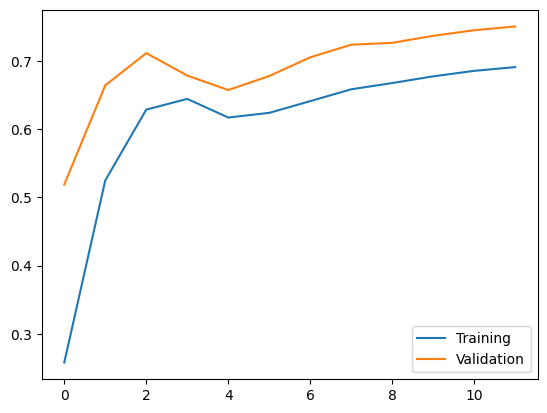

In [ ]:
plt.plot(history1.history['accuracy'],label="Training")
plt.plot(history1.history['val_accuracy'], label="Validation")
plt.legend()
plt.show()

### **Train Vs. Validation Loss**

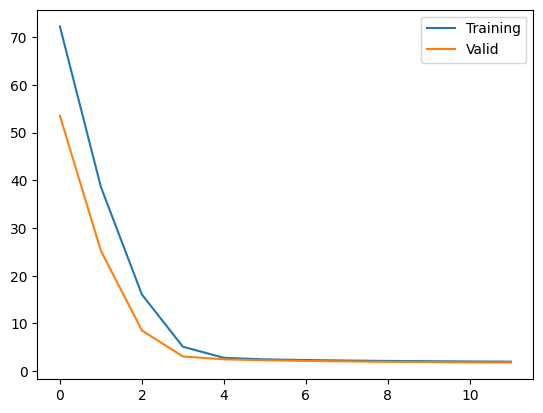

In [ ]:
plt.plot(history1.history['loss'],label="Training")
plt.plot(history1.history['val_loss'], label="Valid")
plt.legend()
plt.show()

# **Model Building With Tuning**

In [ ]:
# Define a function to build the model
def build_model(hp):
    model = Sequential()
    # Add the pre-trained Xception base
    model.add(base)
    # Batch Normalization
    model.add(BatchNormalization())
    # Dropout Layer
    model.add(Dropout(0.35))
    # Tune optimizer
    optimizer_choice = hp.Choice('optimizer', ['sgd', 'rmsprop', 'adam'])
    if optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=hp.Choice('learning_rate_sgd', values=[1e-2, 1e-3, 1e-4]))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Choice('learning_rate_rmsprop', values=[1e-2, 1e-3, 1e-4]))
    else:
        optimizer = Adam(learning_rate=hp.Choice('learning_rate_adam', values=[1e-2, 1e-3, 1e-4]))
    model.add(Dense(units=hp.Int('dense_1_units', min_value=128, max_value=512, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_2_units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(num_of_class, activation='softmax')) ##⚠️⚠️⚠️ Here For Binary classification 1 other wise for n class it will be n

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=hp.Choice('loss_function', ['categorical_crossentropy','binary_crossentropy', 'mse', 'mae']),
                  metrics=['accuracy'])

    return model

Instantiate the RandomSearch tuner to search for the best hyperparameters

In [ ]:

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # optimize based on validation accuracy
    max_trials=3,  # try 3 different hyperparameter combinations
    directory='hyperparameter_tuning',
    project_name='my_image_classification'
)


Perform the hyperparameter search [Adjust Epoch To Save Time]⚠️

In [ ]:
tuner.search(train_ds, validation_data=validation_ds, epochs=1)

Get the best hyperparameters

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Build the model with the best hyperparameters

In [ ]:
best_model = tuner.hypermodel.build(best_hps)

### Train the model with the best hyperparameters [Adjust Epoch According to your needs]⚠️

In [ ]:
history2=best_model.fit(train_ds, validation_data=validation_ds, epochs=12)

# **Result Analysis After Fine Tuning**


### **Normal Train vs Tuning Train Accuracy**



In [ ]:
plt.plot(history1.history['accuracy'],label="Normal Training")
plt.plot(history1.history['val_accuracy'], label="Normal Validation")
plt.plot(history2.history['accuracy'],label="Tuned Training")
plt.plot(history2.history['val_accuracy'], label="Tuned Validation")
plt.legend()
plt.show()

### Save Tuned Model and load it if it is better.Then Predict **[Sorry Could Not Do due to Kaggles Time Consumption.Still First Model Is training]**

## **Get Predictions From The Test Data**

In [ ]:
if USE_Unzipper:
  import zipfile
  zip_ref = zipfile.ZipFile(dataset_loc, 'r')
  zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/datasets/Contest')
  zip_ref.close()

In [ ]:
test_loc='/content/test'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_ds = test_datagen .flow_from_directory(
    directory=test_loc,
    target_size=(224, 224))

Found 1841 images belonging to 1 classes.


In [ ]:
# Function to resize image to 224x224 and convert to numpy array
def preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path)

    # Resize the image to 224x224
    image = image.resize((224, 224))

    # Convert the image to a numpy array
    image_array = np.array(image)

    # If the image has an alpha channel (RGBA), remove it
    if image_array.shape[-1] == 4:
        image_array = image_array[:, :, :3]

    # Normalize the image (optional, based on your model requirements)
    image_array = image_array / 255.0

    return image_array

# Example usage
image_path = loc+'/tennis_ball/tennis_537.jpg'  # Replace with the path to your image
image_array = preprocess_image(image_path)

# Ensure the shape is (224, 224, 3)
print(image_array.shape)
pred=model.predict(Image.open(image_path))
print(pred)

In [ ]:
class_labels = list(test_ds.class_indices.keys())
# Predict on each image and plot results
num_images = 40
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)

    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]

            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

# **Run To Import Packages**

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D,MaxPool2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score, precision_score
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3

import os
import shutil
import matplotlib.pyplot as plt
import random
import numpy as np
from pathlib import Path
from keras.preprocessing.image import load_img
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import cv2
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-3-63f7796b1f7c>:31: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
